<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_4X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_4)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_4X/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,36.936939,76.218192,22.446789,74.552813,-0.863723,219.291009,220.154515,-0.863506
1,0.0,1.0,70.117600,52.867233,21.375659,50.963733,-0.507274,204.816952,205.351718,-0.534766
2,0.0,2.0,51.237145,43.508438,22.627147,85.446110,0.267381,213.086221,212.829130,0.257090
3,0.0,3.0,83.285718,44.201914,55.892127,46.278681,-0.180089,239.478350,239.607754,-0.129404
4,0.0,4.0,95.682347,60.709699,35.263691,50.767780,0.154676,252.578193,252.411163,0.167030
...,...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,75.869607,32.471036,73.927409,70.954190,0.516246,263.738487,263.171870,0.566617
249996,999.0,246.0,85.845603,91.170950,91.658895,21.987386,-0.087549,300.575286,300.831425,-0.256139
249997,999.0,247.0,96.380281,24.728188,75.835546,44.220224,-0.293462,250.870777,251.132606,-0.261829
249998,999.0,248.0,29.791518,20.224938,56.859519,26.490651,-0.406213,142.960414,143.240225,-0.279811


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    36.936939  76.218192  22.446789  74.552813 -0.863723  219.291009   
      1.0    70.117600  52.867233  21.375659  50.963733 -0.507274  204.816952   
      2.0    51.237145  43.508438  22.627147  85.446110  0.267381  213.086221   
      3.0    83.285718  44.201914  55.892127  46.278681 -0.180089  239.478350   
      4.0    95.682347  60.709699  35.263691  50.767780  0.154676  252.578193   
...                ...        ...        ...        ...       ...         ...   
999.0 245.0  75.869607  32.471036  73.927409  70.954190  0.516246  263.738487   
      246.0  85.845603  91.170950  91.658895  21.987386 -0.087549  300.575286   
      247.0  96.380281  24.728188  75.835546  44.220224 -0.293462  250.870777   
      248.0  29.791518  20.224938  56.859519  26.490651 -0.406213  142.960414   
      249.0  42.502740  96.418329  40.460381  30.198014  0.532851  220.112315   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    220.154515 -0.863506  
      1.0    205.351718 -0.534766  
      2.0    212.829130  0.257090  
      3.0    239.607754 -0.129404  
      4.0    252.411163  0.167030  
...                 ...       ...  
999.0 245.0  263.171870  0.566617  
      246.0  300.831425 -0.256139  
      247.0  251.132606 -0.261829  
      248.0  143.240225 -0.279811  
      249.0  219.684440  0.427875  

[250000 rows x 8 columns]

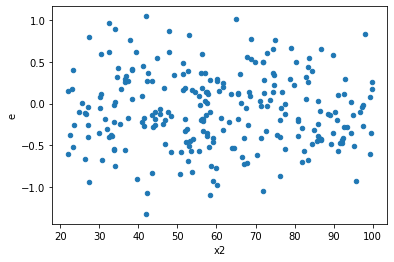

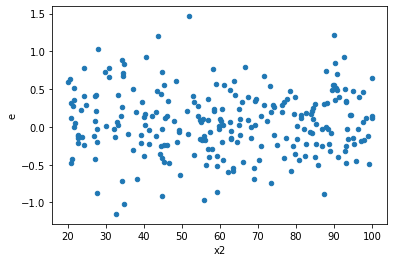

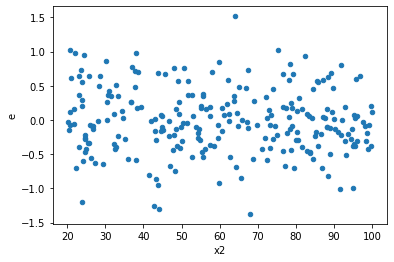

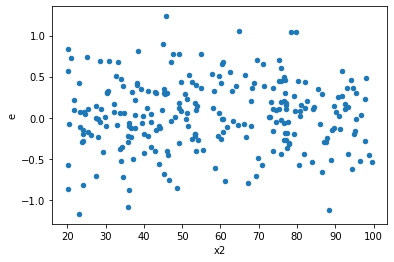

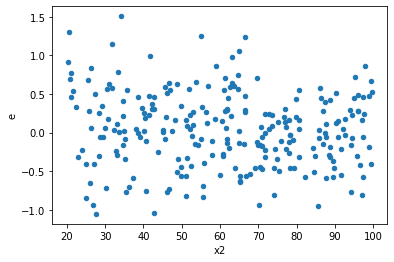

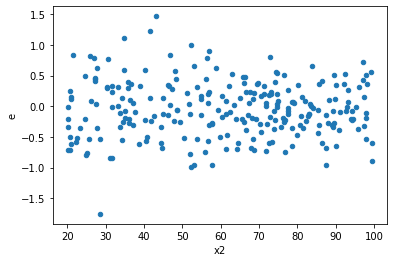

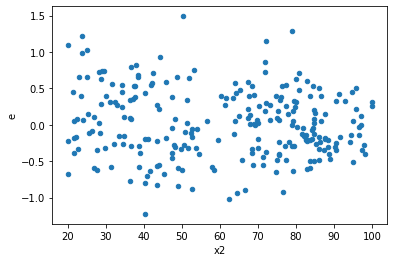

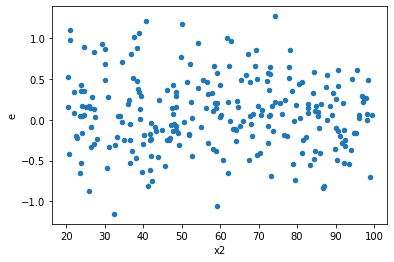

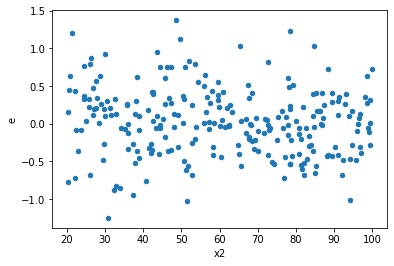

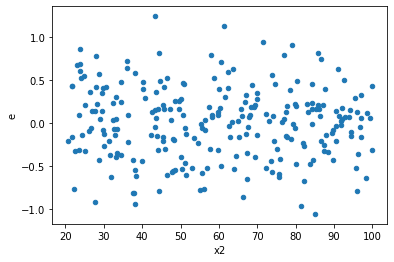

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,121.0,121.0,21.132752565014957,22.61031170799494,0.17465084764475172,0.18686208023136314,1.069917969201327,0.7107131262814936,0.6446434368592532,0.3553565631407468,Reject005=1 : Homoscedasticity
3.0,121.0,121.0,20.516670063002234,21.091017617293275,0.16955925671902672,0.17430593072143202,1.0279941897260787,0.8795525094091976,0.5602237452954012,0.4397762547045988,Reject005=1 : Homoscedasticity
4.0,132.0,110.0,24.616177645734794,28.50884581822857,0.18648619428586966,0.25917132562025974,1.389761459891069,0.07497480474431018,0.9625125976278449,0.03748740237215509,Reject005=1 : Homoscedasticity
6.0,107.0,135.0,21.48732524367364,31.69670656550693,0.20081612377265085,0.23479041900375502,1.1691811125164797,0.38905395590509273,0.8054730220474536,0.19452697795254636,Reject005=1 : Homoscedasticity
7.0,130.0,112.0,25.058553249615308,21.82226838149776,0.19275810192011775,0.19484168197765858,1.0108092995147062,0.9566862919276828,0.5216568540361586,0.4783431459638414,Reject005=1 : Homoscedasticity
8.0,120.0,122.0,22.288474889115726,25.128243272114673,0.18573729074263104,0.20596920714848094,1.108927595126196,0.570084641375681,0.7149576793121595,0.2850423206878405,Reject005=1 : Homoscedasticity
11.0,115.0,127.0,20.75355272012422,27.44322598200038,0.18046567582716713,0.21608839355905812,1.1973933135407258,0.3215091599875277,0.8392454200062361,0.16075457999376386,Reject005=1 : Homoscedasticity
12.0,115.0,127.0,21.840470343513772,25.6701360020313,0.1899171334218589,0.20212705513410473,1.0642907856297736,0.73029757667959,0.634851211660205,0.365148788339795,Reject005=1 : Homoscedasticity
13.0,121.0,121.0,24.306427898918162,26.600584746040013,0.2008795694125468,0.21983954335570258,1.0943847798887782,0.6206350923957116,0.6896824538021442,0.3103175461978558,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,106.0,136.0,21.710127222571728,26.106472988243073,0.2048125209676578,0.19195936020766965,0.9372442627078555,0.730173362842958,Reject005=1 : Homoscedasticity
1.0,121.0,121.0,21.132752565014957,22.61031170799494,0.17465084764475172,0.18686208023136314,1.069917969201327,0.7107131262814936,Reject005=1 : Homoscedasticity
2.0,139.0,103.0,33.21816861274384,21.154631033028494,0.23897963030750963,0.20538476731095626,0.8594237385281548,0.40424646065239433,Reject005=1 : Homoscedasticity
3.0,121.0,121.0,20.516670063002234,21.091017617293275,0.16955925671902672,0.17430593072143202,1.0279941897260787,0.8795525094091976,Reject005=1 : Homoscedasticity
4.0,132.0,110.0,24.616177645734794,28.50884581822857,0.18648619428586966,0.25917132562025974,1.389761459891069,0.07497480474431018,Reject005=1 : Homoscedasticity
5.0,126.0,116.0,32.822645010391255,18.157080412463262,0.2604971826221528,0.1565265552798557,0.6008761926108624,0.0052602071718069405,Reject005=0 : Heteroscedasticity
6.0,107.0,135.0,21.48732524367364,31.69670656550693,0.20081612377265085,0.23479041900375502,1.1691811125164797,0.38905395590509273,Reject005=1 : Homoscedasticity
7.0,130.0,112.0,25.058553249615308,21.82226838149776,0.19275810192011775,0.19484168197765858,1.0108092995147062,0.9566862919276828,Reject005=1 : Homoscedasticity
8.0,120.0,122.0,22.288474889115726,25.128243272114673,0.18573729074263104,0.20596920714848094,1.108927595126196,0.570084641375681,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      882
Reject005=0 : Heteroscedasticity    118
Name: Result_test, dtype: int64